# Black Friday Project

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import the dataset
df=pd.read_csv('blackFriday_train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Pre-processing

In [5]:
#Checking shape of dataset
df.shape

(550068, 12)

In [6]:
df.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [7]:
# checking null values 
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
# checking the null values in terms of percentages
df.isnull().sum()/df.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [9]:
# dropping all the column that having missing values more than 50%
df.drop(['Product_Category_3'], axis=1,inplace=True) 

In [10]:
# dropping all the unwanted column
df.drop(['User_ID','Product_ID'], axis=1,inplace=True)

In [11]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


In [12]:
# checking the shape of dataset after removing the columns
df.shape

(550068, 9)

### Treating the null values

In [13]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])  # By mode method

In [14]:
# checking null values 
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

## Checking  the Duplicate

In [15]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
3277,M,26-35,12,A,1,0,5,8.0,8640
3389,M,26-35,6,A,3,0,16,8.0,20872
3516,M,26-35,17,A,3,0,1,2.0,11887
3634,F,26-35,11,B,1,0,8,8.0,7886
7465,M,26-35,12,B,1,1,5,8.0,8882
...,...,...,...,...,...,...,...,...,...
549943,M,26-35,17,C,4+,0,19,8.0,48
549965,M,36-45,0,C,1,0,19,8.0,60
549970,M,36-45,17,C,1,0,19,8.0,61
550004,M,51-55,12,C,1,1,19,8.0,12


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase


In [18]:
# checking the datatypes 
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [20]:
# here we have problem in stay in current city year it should be int but we have  + sign so it become object
df.loc[df['Stay_In_Current_City_Years']=='4+']

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
4,M,55+,16,C,4+,0,8,8.0,7969
19,M,26-35,12,C,4+,1,1,5.0,19614
20,M,26-35,12,C,4+,1,5,14.0,8584
21,M,26-35,12,C,4+,1,8,8.0,9872
22,M,26-35,12,C,4+,1,8,8.0,9743
...,...,...,...,...,...,...,...,...,...
550050,M,36-45,15,C,4+,1,20,8.0,368
550055,M,26-35,0,A,4+,0,20,8.0,238
550056,M,26-35,17,C,4+,0,20,8.0,254
550065,F,26-35,15,B,4+,1,20,8.0,137


In [21]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace("4+",np.nan)

In [22]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(float)

In [23]:
df['Stay_In_Current_City_Years'].fillna(4 , inplace=True)

In [24]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years    float64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

## EDA and Visualization

********************
M    407752
F    134240
Name: Gender, dtype: int64
********************


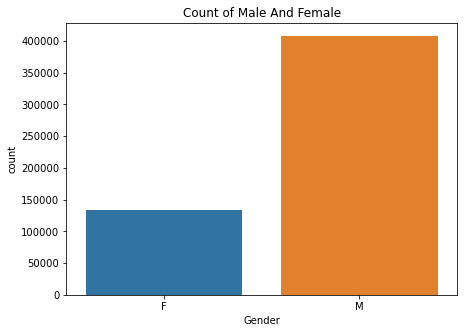

In [25]:
# Seeing which car sold most
plt.figure(figsize=(7,5))
sns.countplot(x='Gender' , data=df)
plt.title('Count of Male And Female')
print('*'*20)
print(df.Gender.value_counts())
print('*'*20)
plt.show()

## From the above bar graph, we observe the count of the male is more than female where the count of the male is 407752 and females is 134240.

********************
26-35    216095
36-45    108693
18-25     97587
46-50     45253
51-55     38140
55+       21327
0-17      14897
Name: Age, dtype: int64
********************


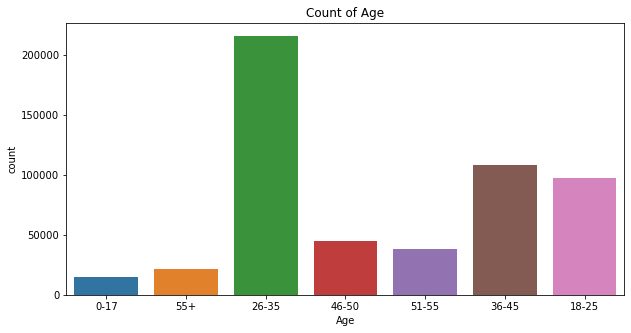

In [40]:
# Seeing which car sold most
plt.figure(figsize=(10,5))
sns.countplot(x='Age' , data=df)
plt.title('Count of Age')
print('*'*20)
print(df.Age.value_counts())
print('*'*20)
plt.show()

## From the above bar graph, we observe there is a range of age ranging from 0 to 55+ and the most count or the people present most is of age ranging from 26-35 age followed by 36-45 age and 18-25 age and the count for that age group is 216095, 108693 and 97587.

********************
4     70274
0     68433
7     58154
1     46888
17    39528
20    33108
12    30844
14    27038
2     26257
16    25104
6     20100
3     17481
10    12754
15    12085
5     12078
11    11496
19     8378
13     7650
18     6574
9      6232
8      1536
Name: Occupation, dtype: int64
********************


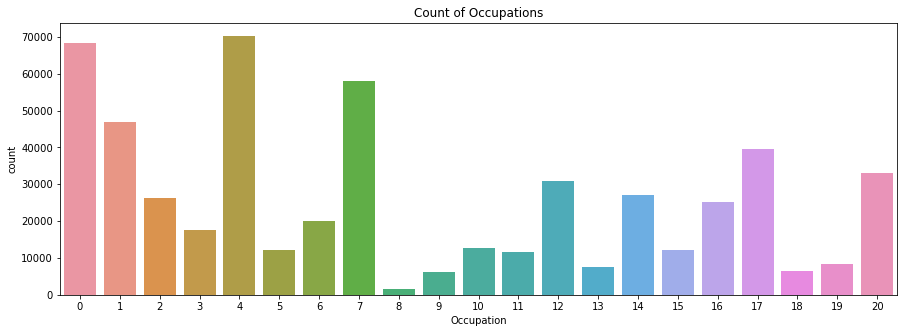

In [41]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='Occupation' , data=df)
plt.title('Count of Occupations')
print('*'*20)
print(df.Occupation.value_counts())
print('*'*20)
plt.show()

## From the above bar graph, we observe the occupation of the people and the people are mostly from occupation 4 with 70274 people and the least amount of people are from occupation 8 with only 1536 people.

In [28]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

********************
B    227377
C    169417
A    145198
Name: City_Category, dtype: int64
********************


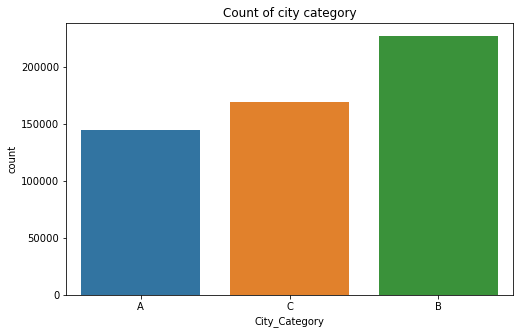

In [42]:
# Seeing which car sold most
plt.figure(figsize=(8,5))
sns.countplot(x='City_Category' , data=df)
plt.title('Count of city category')
print('*'*20)
print(df.City_Category.value_counts())
print('*'*20)
plt.show()

## From the above Bar graph, we observe there are 3 city category and most of the people is from the B city category with 227377 people followed by the C city category with 169417 people and the least is from the A city category with 145198 people.

********************
1.0    190376
2.0    100503
3.0     94068
4.0     83568
0.0     73477
Name: Stay_In_Current_City_Years, dtype: int64
********************


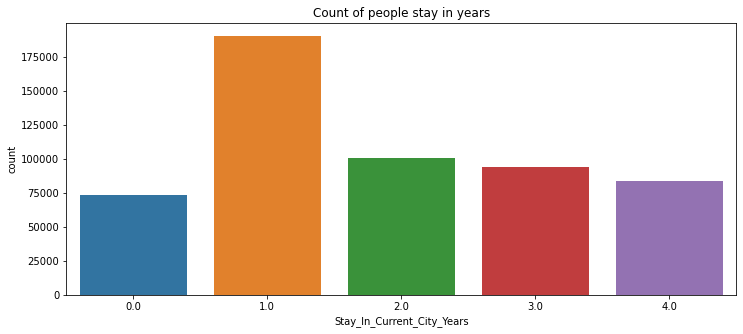

In [43]:
# Seeing which car sold most
plt.figure(figsize=(12,5))
sns.countplot(x='Stay_In_Current_City_Years' , data=df)
plt.title('Count of people stay in years')
print('*'*20)
print(df.Stay_In_Current_City_Years.value_counts())
print('*'*20)
plt.show()

## From the above bar graph we observe most of the people stay in the current city for 1 year is most which means most of the people are new cummer and we observe next is from 2 to 4+ years the count of the people stay in the current city is decreasing.

********************
0    319332
1    222660
Name: Marital_Status, dtype: int64
********************


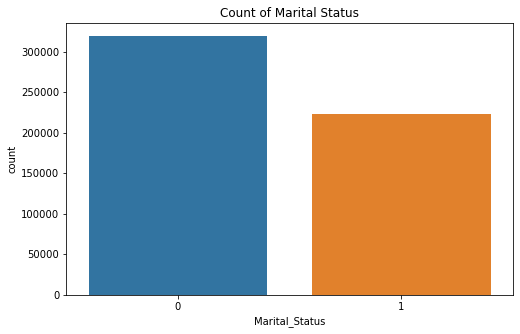

In [44]:
# Seeing which car sold most
plt.figure(figsize=(8,5))
sns.countplot(x='Marital_Status' , data=df)
plt.title('Count of Marital Status')
print('*'*20)
print(df.Marital_Status.value_counts())
print('*'*20)
plt.show()

## From the above bar graph, we observe most of the people are single around 319332 people, and 222660 people are married.

********************
5     146496
1     139489
8     111933
11     24093
2      23831
6      20422
3      20087
4      11632
16      9805
15      6287
13      5472
10      5124
12      3923
7       3716
18      3106
20      2528
19      1540
14      1521
17       577
9        410
Name: Product_Category_1, dtype: int64
********************


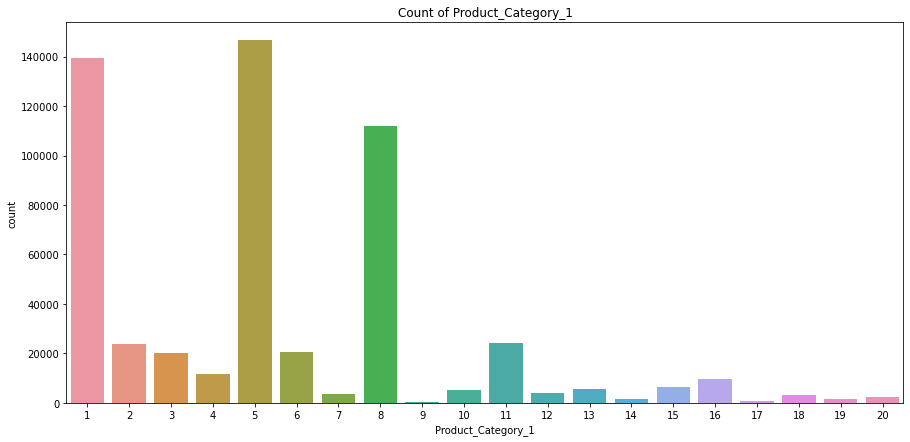

In [46]:
# Seeing which car sold most
plt.figure(figsize=(15,7))
sns.countplot(x='Product_Category_1' , data=df)
plt.title('Count of Product_Category_1')
print('*'*20)
print(df.Product_Category_1.value_counts())
print('*'*20)
plt.show()

## From the above bar graph, we observe there are around 20 categories in Product_Category_1, and the count which most is for 5,1,8 categories with the count of 146496, 139489, and 111933, etc.

********************
8.0     231507
14.0     54599
2.0      48654
16.0     43040
15.0     37732
5.0      26082
4.0      25530
6.0      16425
11.0     14100
17.0     13283
13.0     10516
9.0       5688
12.0      5519
10.0      3041
3.0       2883
18.0      2767
7.0        626
Name: Product_Category_2, dtype: int64
********************


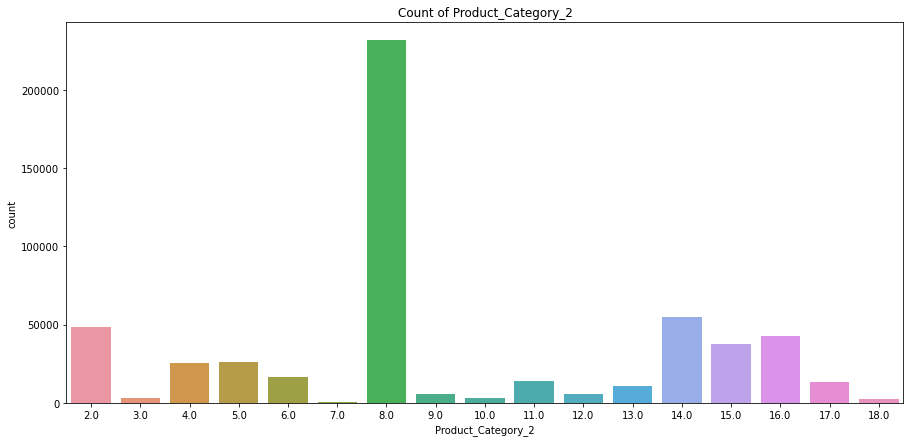

In [45]:
# Seeing which car sold most
plt.figure(figsize=(15,7))
sns.countplot(x='Product_Category_2' , data=df)
plt.title('Count of Product_Category_2')
print('*'*20)
print(df.Product_Category_2.value_counts())
print('*'*20)
plt.show()

## From the above bar graph, we observe there are around 17 categories in Product_Category_2, and the count which most is for 8,14 categories with the count of 231507 and 54599, etc.

In [34]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2.0,0,3,8.0,8370
1,F,0-17,10,A,2.0,0,1,6.0,15200
2,F,0-17,10,A,2.0,0,12,8.0,1422
3,F,0-17,10,A,2.0,0,12,14.0,1057
4,M,55+,16,C,4.0,0,8,8.0,7969


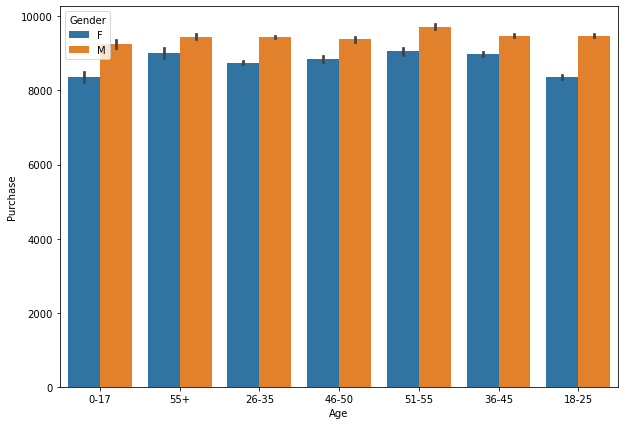

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(data=df,x='Age',y='Purchase',hue='Gender')
plt.show()

## From the above bar graph, we observe the age group and purchase with additional information on gender and we observe that in each category male purchase is greater than female.

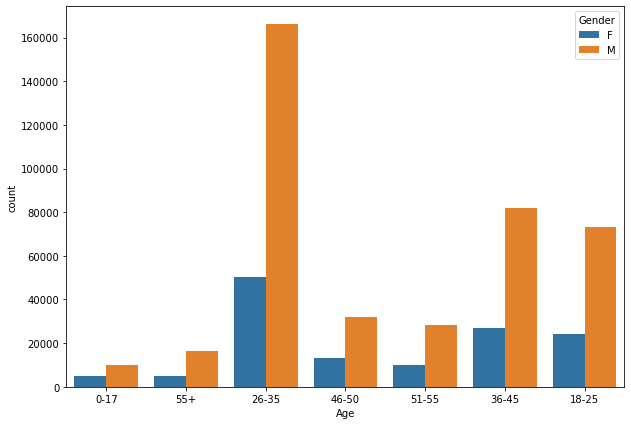

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Age'],hue=df['Gender'])
plt.show()

## From the above bar graph, we observe the age group and information of gender and we observe that in each category male count is more than the female, especially in the age group 26-35 age group.

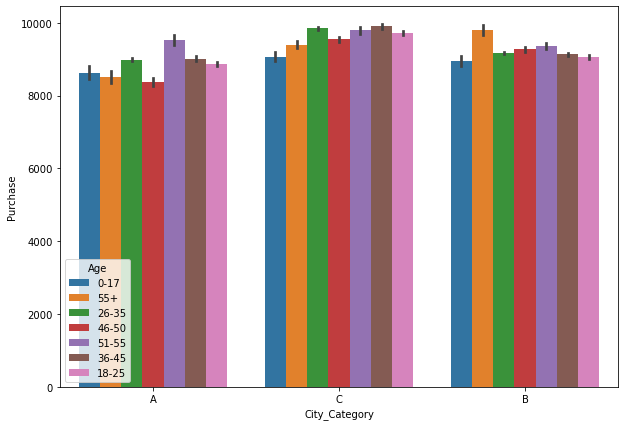

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['City_Category'],y=df['Purchase'],hue=df['Age'])
plt.show()

## From the above bar graph, we observe the city category and purchase with additional information on age group and we observe that in each city category, the purchase history of all different age groups is different there is no trend.

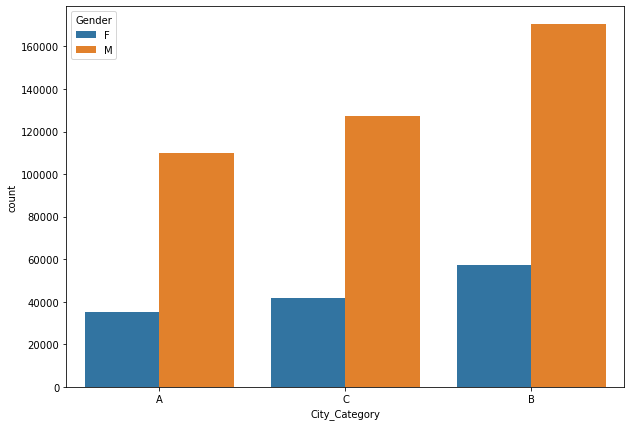

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['City_Category'],hue=df['Gender'])
plt.show()

## From the above bar graph, we observe that city category and Gender information we already know that the male count is greater than the female count but the count of the male from B city category is followed by C city category and last A city category and this is same for female.

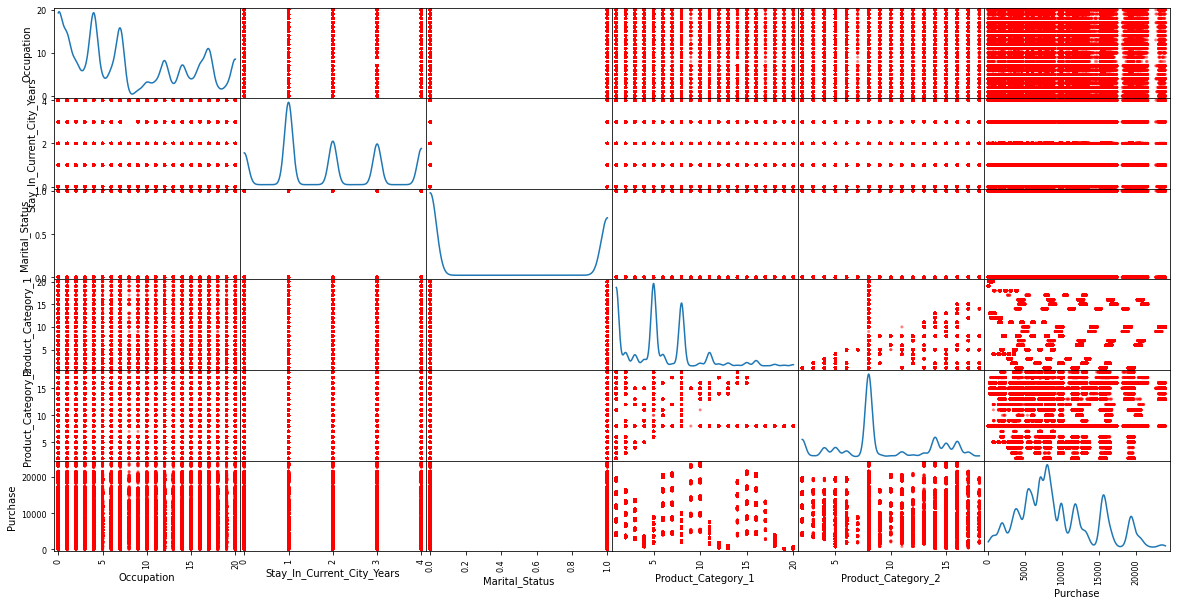

In [38]:
# with kde
from pandas.plotting import scatter_matrix
scatter_matrix (df , figsize = (20,10) , color = 'r' , diagonal = 'kde')
plt.show()

In [39]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2.0,0,3,8.0,8370
1,F,0-17,10,A,2.0,0,1,6.0,15200
2,F,0-17,10,A,2.0,0,12,8.0,1422
3,F,0-17,10,A,2.0,0,12,14.0,1057
4,M,55+,16,C,4.0,0,8,8.0,7969


In [40]:
Total_no_of_Age_df = df.groupby('Age').sum()
#Countries_Total_no_of_Deaths_noyear_df.drop('Year',axis=1,inplace=True)

In [41]:
Total_no_of_Age_df

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Age,,,,,,
0-17,130399,26568.0,0,75685,130238.0,133355956
18-25,660799,177799.0,20879,498107,882082.0,898135897
26-35,1709330,409521.0,85053,1147449,1999973.0,2005130871
36-45,961518,205758.0,43174,596571,1016624.0,1016861250
46-50,385584,79787.0,32674,259629,429329.0,417520332
51-55,336062,67742.0,27381,219932,364274.0,364292302
55+,202388,40683.0,13499,129236,205216.0,199423214


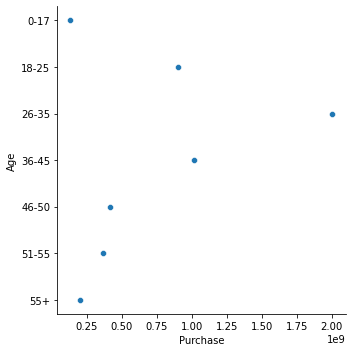

In [42]:
sns.relplot(x='Purchase' , y='Age', data = Total_no_of_Age_df )
plt.show()

In [43]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [44]:
prices = pd.pivot_table(Total_no_of_Age_df, values = "Purchase", columns = "Age")
prices

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Purchase,133355956,898135897,2005130871,1016861250,417520332,364292302,199423214


In [50]:
prices = pd.pivot_table(Total_no_of_Age_df, values = "Purchase", index = "Age")
prices

,Purchase
Age,
0-17,133355956
18-25,898135897
26-35,2005130871
36-45,1016861250
46-50,417520332
51-55,364292302
55+,199423214


In [51]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

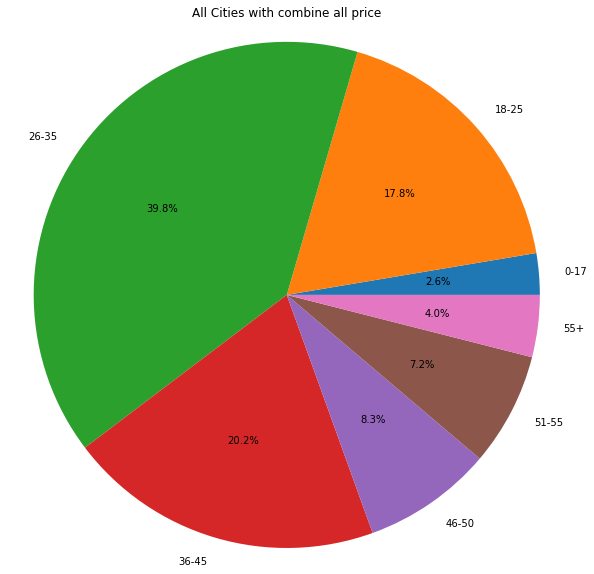

In [57]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
sizes = [133355956,898135897,2005130871,1016861250,417520332,364292302,199423214]

#fig, ax = plt.subplots(figsize =(10, 5))
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('All Cities with combine all price')


plt.show()

## From the above bar graph, we observe the total sum of money spent by each age group around 39.8 % of purchases came from the age group 26-35 followed by 20.2% of purchases came from the age group 36-45 and around 17.8% purchase came from the age group of 18-25.

In [ ]:
df.columns

In [54]:
Total_no_of_Age_df = df.groupby('City_Category').sum()

In [55]:
prices = pd.pivot_table(Total_no_of_Age_df, values = "Purchase", columns = "City_Category")
prices

City_Category,A,B,C
Purchase,1298438430,2086774872,1649506520


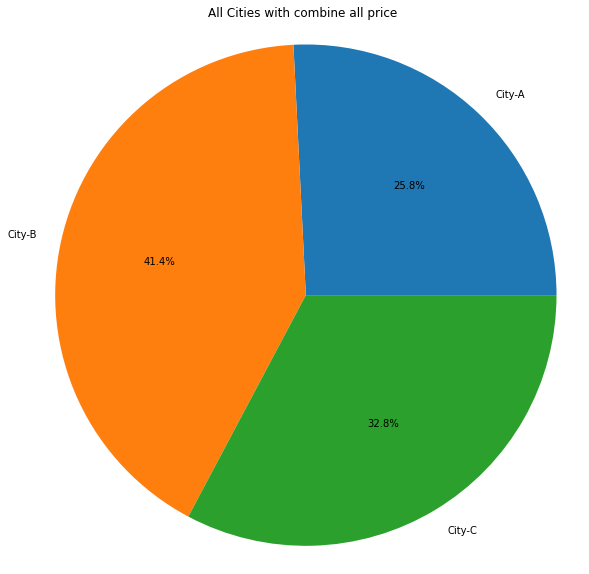

In [58]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['City-A' , 'City-B' ,'City-C']
sizes = [1298438430,2086774872,1649506520]

#fig, ax = plt.subplots(figsize =(10, 5))
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('All Cities with combine all price')


plt.show()

## From the above bar graph we observe the total sum of money spent by each age city category around 41.4 % of purchases came from the B city category followed by 32.8% of purchases came from the c city category and around 25.8% of purchases came from the A city category.

In [59]:
Total_no_of_Age_df = df.groupby('Gender').sum()

In [60]:
prices = pd.pivot_table(Total_no_of_Age_df, values = "Purchase", columns = "Gender")
prices

Gender,F,M
Purchase,1174872942,3859846880


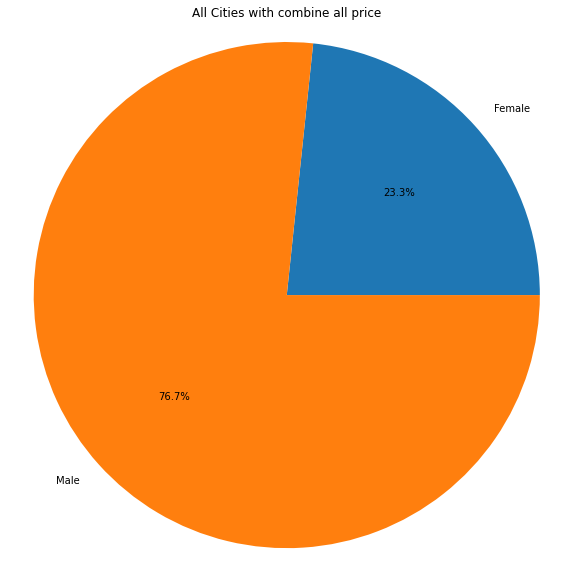

In [62]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Female' , 'Male']
sizes = [1174872942,3859846880]

#fig, ax = plt.subplots(figsize =(10, 5))
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('All Cities with combine all price')


plt.show()

In [63]:
Total_no_of_Age_df = df.groupby('Stay_In_Current_City_Years').sum()

In [64]:
prices = pd.pivot_table(Total_no_of_Age_df, values = "Purchase", columns = "Stay_In_Current_City_Years")
prices

Stay_In_Current_City_Years,0.0,1.0,2.0,3.0,4.0
Purchase,676026589,1767014918,938681110,875575530,777421675


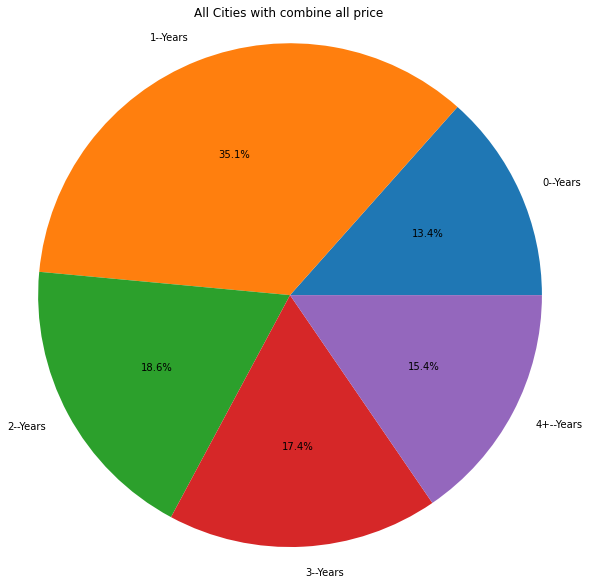

In [66]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['0--Years' , '1--Years' , '2--Years' ,'3--Years', '4+--Years']
sizes = [676026589,1767014918,938681110,875575530,777421675]

#fig, ax = plt.subplots(figsize =(10, 5))
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('All Cities with combine all price')


plt.show()

In [67]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [68]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2.0,0,3,8.0,8370
1,F,0-17,10,A,2.0,0,1,6.0,15200
2,F,0-17,10,A,2.0,0,12,8.0,1422
3,F,0-17,10,A,2.0,0,12,14.0,1057
4,M,55+,16,C,4.0,0,8,8.0,7969


## Applying Label Encoder to categorical columns

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le=LabelEncoder()
df1=le.fit_transform(df['Gender'])
pd.Series(df1)

0         0
1         0
2         0
3         0
4         1
         ..
541987    1
541988    0
541989    0
541990    0
541991    0
Length: 541992, dtype: int32

In [71]:
df['Gender']=df1

In [72]:
df2=le.fit_transform(df['Age'])
pd.Series(df1)
df['Age']=df2

In [73]:
df3=le.fit_transform(df['City_Category'])
pd.Series(df1)
df['City_Category']=df3

In [74]:
df.dtypes

Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years    float64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [75]:
df.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,541992.000000,541992.000000,541992.000000,541992.000000,541992.000000,541992.000000,541992.000000,541992.000000,541992.000000
mean,0.752321,2.501015,8.092518,1.044685,1.859544,0.410818,5.399727,9.276403,9289.288074
std,0.431665,1.355146,6.526274,0.760581,1.290003,0.491983,3.949846,4.309923,5038.020509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,5827.000000
50%,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,8.000000,8058.000000
75%,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,12078.000000
max,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,23961.000000


## Observations
    There was null values in the dataset we treated the null values

    We also deleted some unwanted column

    After all oprations we perform the dataset is now contain 541992 rows and 9 columns

    Here all the columns are categorical columns so we ignore all the describe thing but there is one continious feature that is purchase column but its a traget varaible we are not doing any operations to that

## Plotting the heatmap to observe Co-relation

In [76]:
corr=df.corr()
corr.shape

(9, 9)

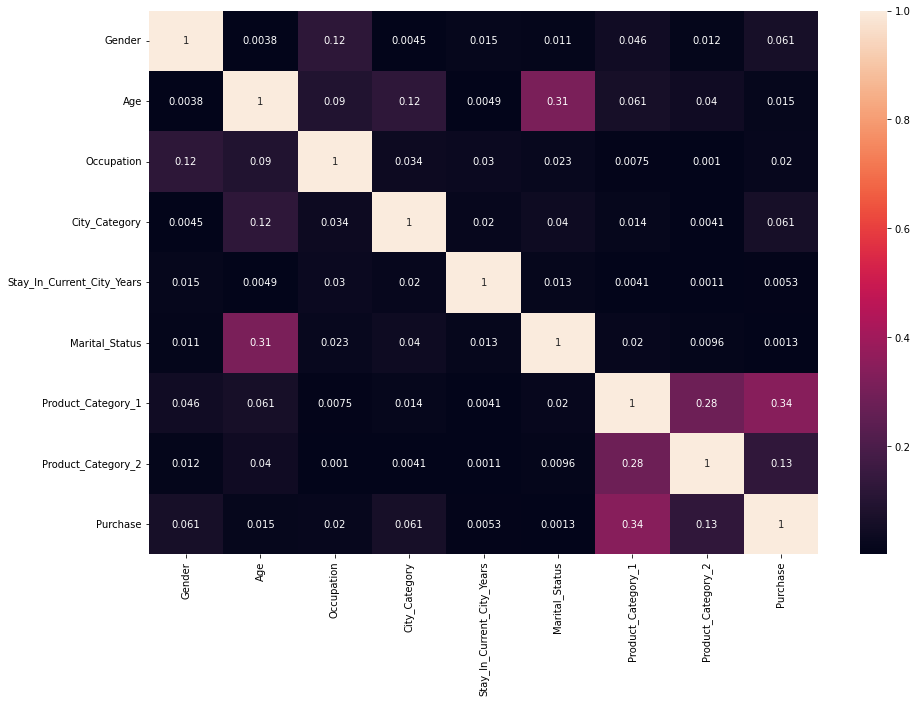

In [77]:
corr=df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

## From the above heatmap, we observe there is no sign of Multicollinearity exist there are 2 features Product category 1 and product category 2 which are positively correlated to our label purchase.

## Plotting Histogram plot to see how data is distributed on an interval scale.

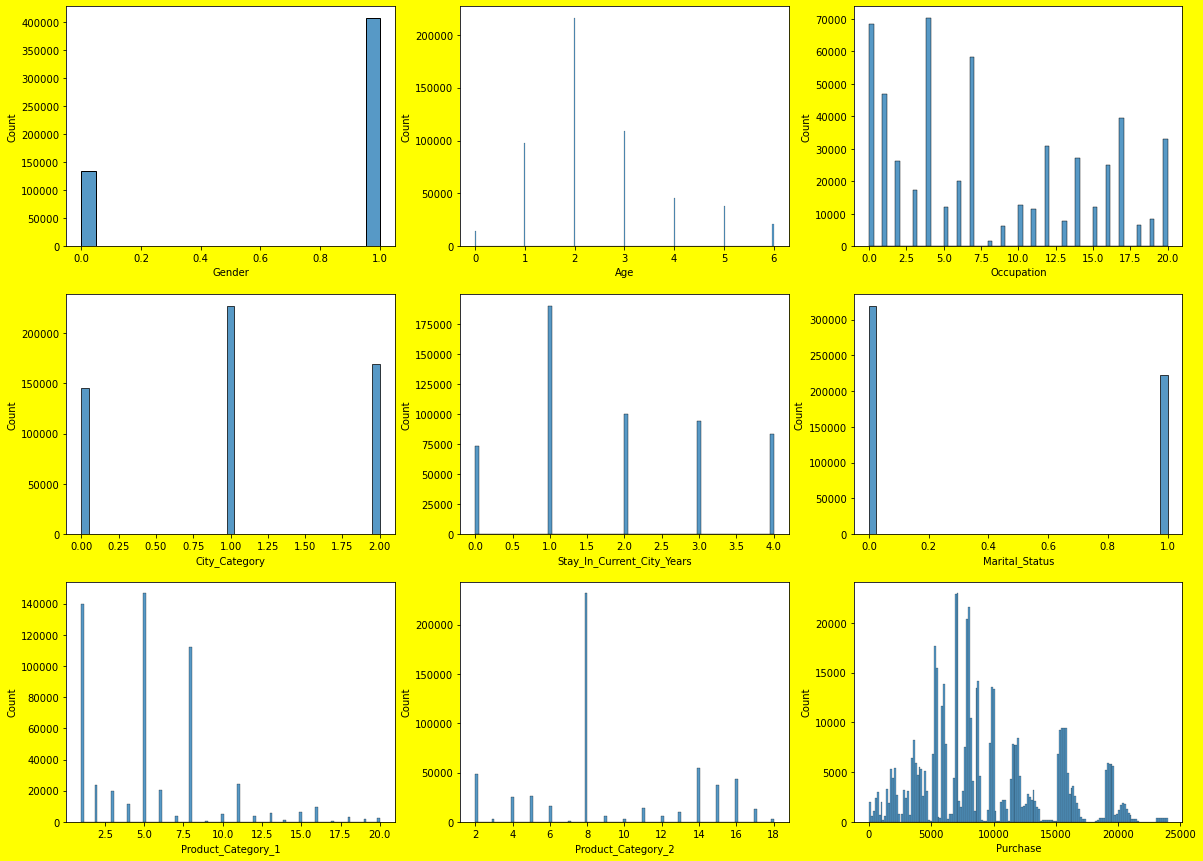

In [78]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Distribution plot to see how data is distributed

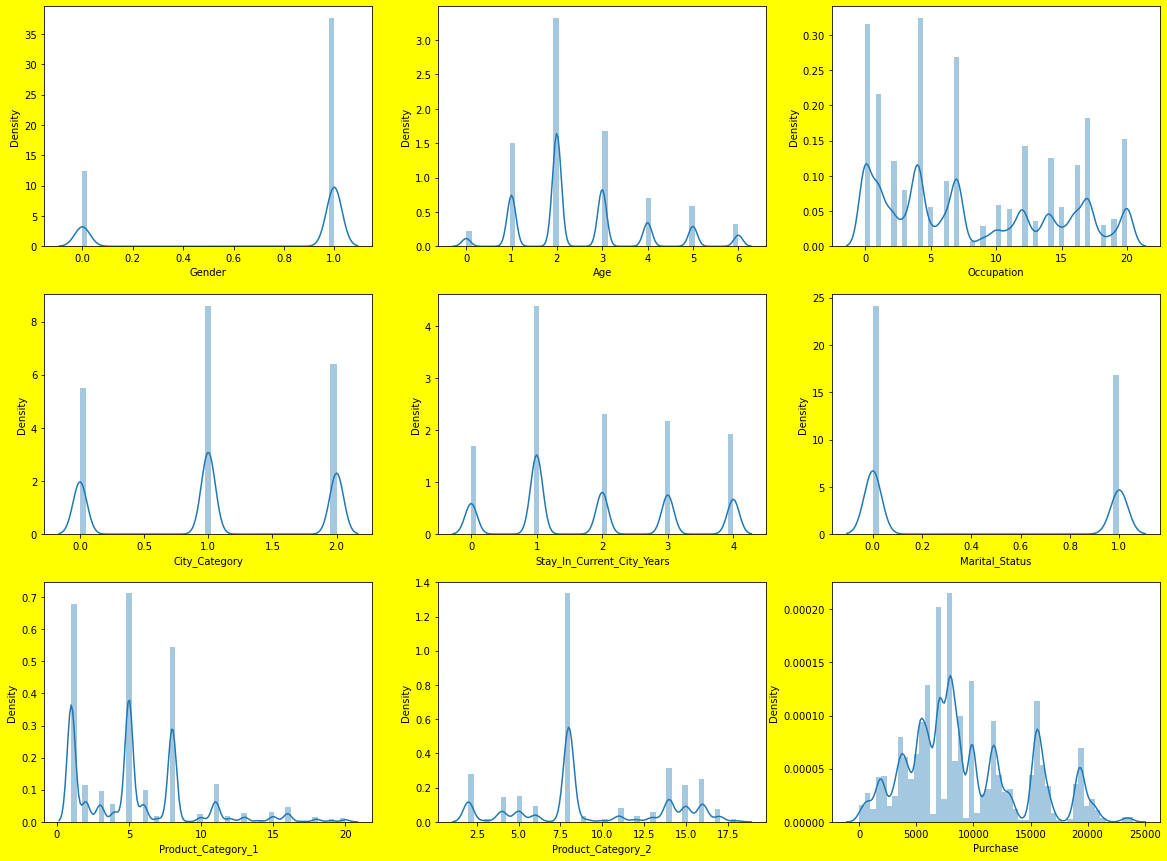

In [79]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Seperating the feature and label

In [80]:
X = df.drop(['Purchase'],axis = 1)
y = df['Purchase']

## Plotting Scatter plot to see realtion between feature and label

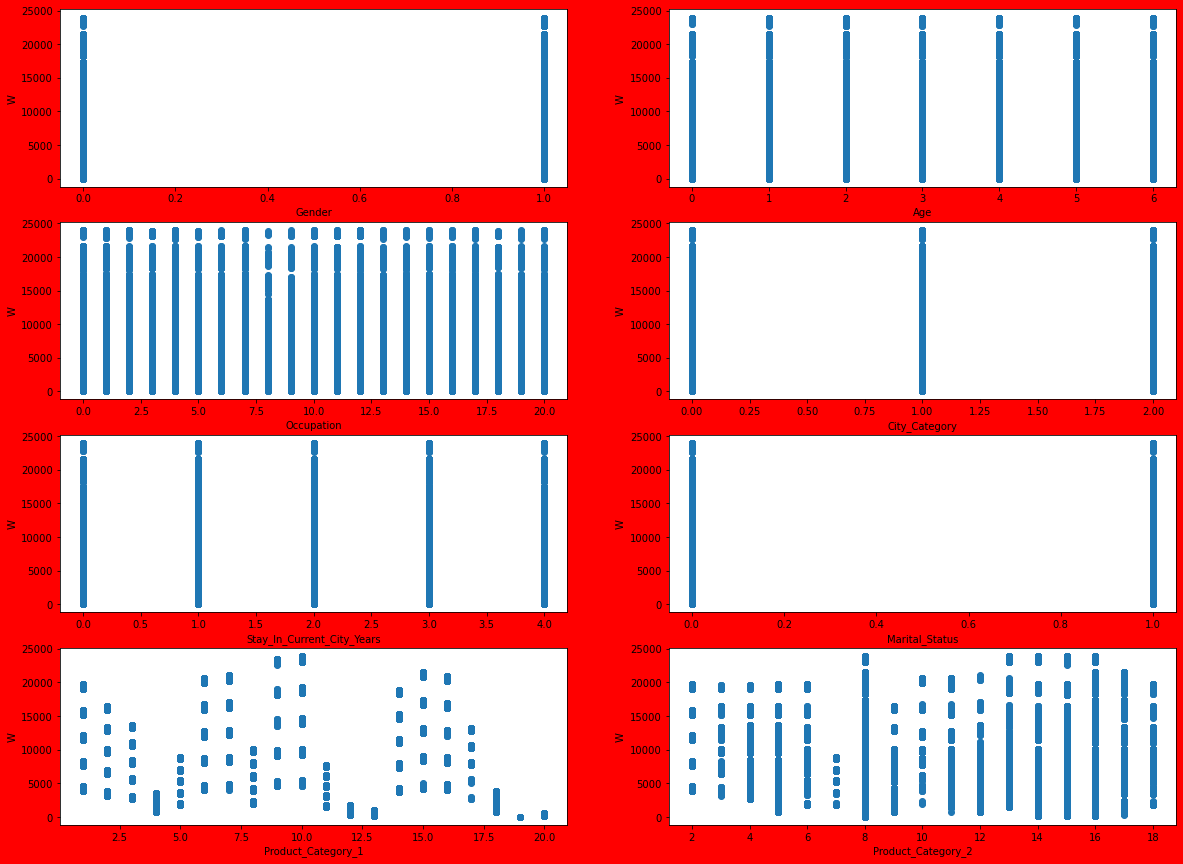

In [81]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 8:
        ax = plt.subplot(4,2,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see realtion between feature and label

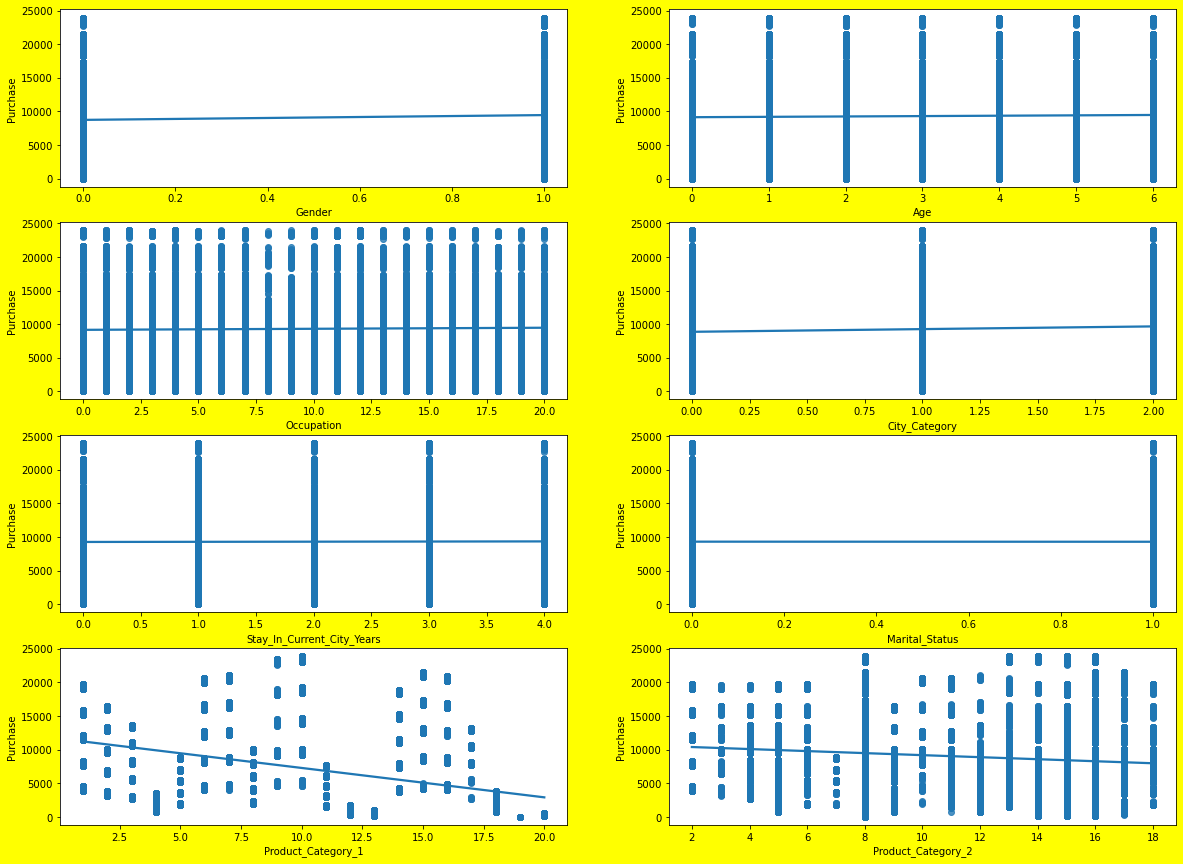

In [82]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 8:
        ax = plt.subplot(4,2,plotnumber)
        sns.regplot (df[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Box plot to see outliers are present are not

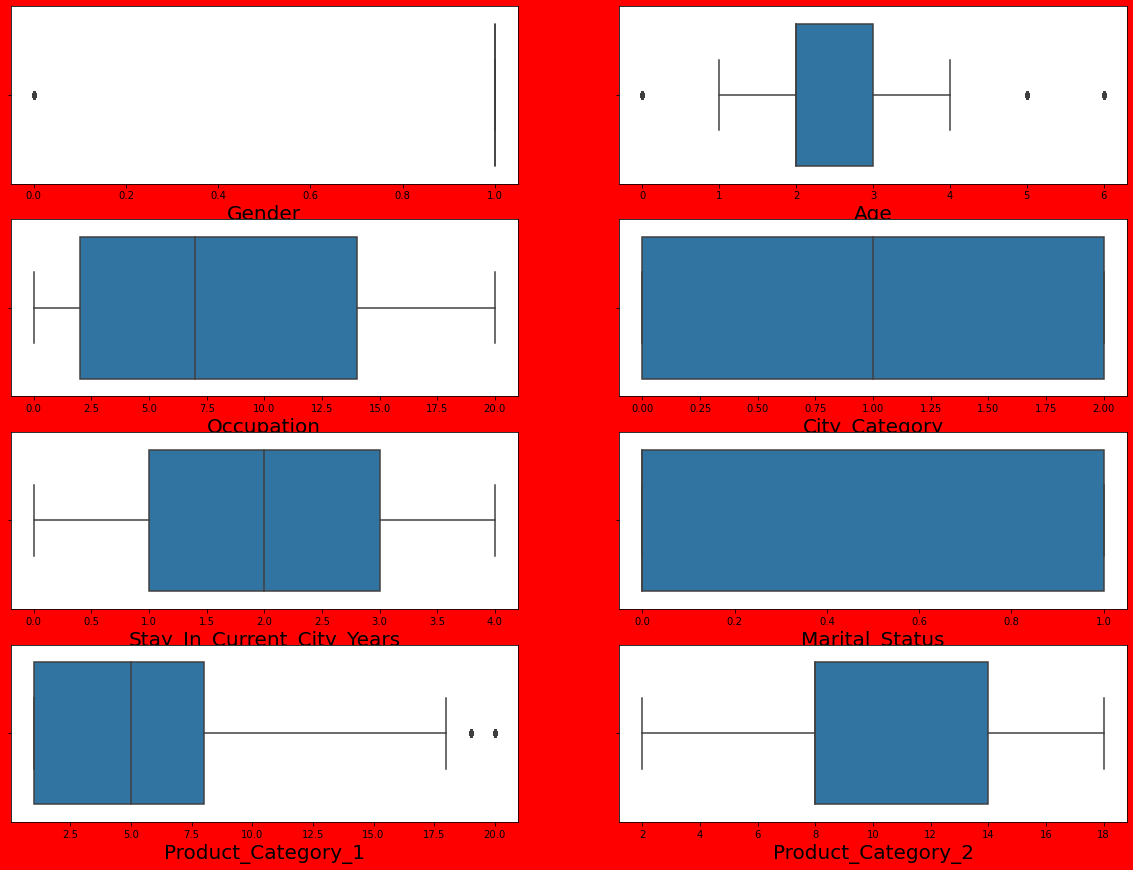

In [83]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in X:
    
    if graph <= 8:
        plt.subplot (4,2,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## From above box plot we observe there are small amount of outliers present in our dataset and we are going to treat it with Z-score method.

## We will treat outliers with Z-Score method

In [84]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [85]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.8 ).all(axis=1)

df = df[filtering_entry]

df.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,534241.000000,534241.000000,534241.000000,534241.000000,534241.000000,534241.000000,534241.000000,534241.000000,534241.000000
mean,0.751739,2.495844,8.089237,1.042129,1.859897,0.410309,5.205651,9.294921,9393.941543
std,0.432004,1.351998,6.527454,0.760226,1.290100,0.491890,3.630385,4.338313,4987.361289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,185.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,5899.000000
50%,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,8.000000,8082.000000
75%,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,12109.000000
max,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,16.000000,18.000000,23961.000000


In [86]:
df.shape

(534241, 9)

### Dataloss after removing outliers

In [87]:
data_loss=(541992-534241)/541992
data_loss

0.014300949091499506

## Finding correlation between feature n lable using CORR method

In [88]:
# finding correlation between feature n lable using CORR method
#  (code type      --   feature corrwith label)

df.drop('Purchase' , axis =1 ).corrwith (df.Purchase)

Gender                        0.063454
Age                           0.019433
Occupation                    0.021146
City_Category                 0.068007
Stay_In_Current_City_Years    0.004880
Marital_Status               -0.000124
Product_Category_1           -0.301849
Product_Category_2           -0.137620
dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

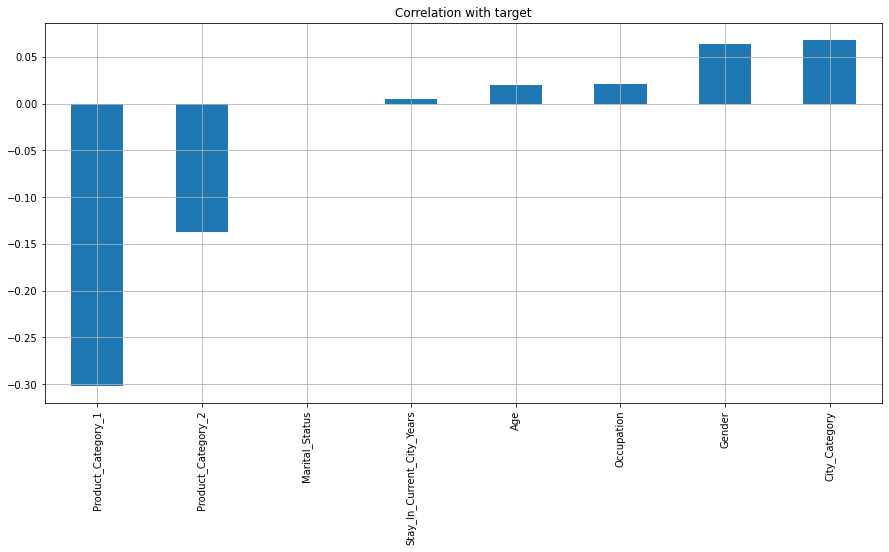

In [89]:
#  (code type      --   feature corrwith label)

df.drop('Purchase' , axis =1 ).corrwith (df.Purchase).sort_values().plot(kind='bar',grid=True,figsize=(15,7),title='Correlation with target')

## Scaling the data

In [90]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Checking for the multicollinearity Using VIF

In [91]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.016670,Gender
1,1.134846,Age
2,1.024110,Occupation
3,1.016873,City_Category
4,1.001605,Stay_In_Current_City_Years
5,1.107062,Marital_Status
6,1.090124,Product_Category_1
7,1.085215,Product_Category_2


### Selecting all the feature

# Linear Regression Model

In [92]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [93]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 12.482053118583703 RandomState 0
Testing Score 12.471652890335083 RandomState 0


MAXINING TESTING SCORE 12.471652890335083 ON RANDOM STATE OF 0
Training Score 12.494962329321414 RandomState 1
Testing Score 12.430649025938823 RandomState 1


Training Score 12.599232110424285 RandomState 2
Testing Score 12.117350168128805 RandomState 2


Training Score 12.527691100953998 RandomState 3
Testing Score 12.332353303223965 RandomState 3


Training Score 12.39014377360288 RandomState 4
Testing Score 12.743780988035525 RandomState 4


MAXINING TESTING SCORE 12.743780988035525 ON RANDOM STATE OF 4
Training Score 12.512346801963936 RandomState 5
Testing Score 12.380045961855757 RandomState 5


Training Score 12.564468392683493 RandomState 6
Testing Score 12.221447758955373 RandomState 6


Training Score 12.558952742377361 RandomState 7
Testing Score 12.238215502553384 RandomState 7


Training Score 12.501553706878921 RandomState 8
Testing Score 12.410925196312405 RandomState 8


Tr

In [94]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 12.948996076233133 ON RANDOM STATE OF 87


### Training the model

In [95]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=87)

In [96]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [97]:
#training score
regression.score(X_train,y_train)  

0.12321285730892861

In [98]:
#testing score
regression.score(X_test,y_test) 

0.12948996076233132

# Model Score
    Training Score = 12.321285730892861 %
    Testing Score = 12.948996076233132 %

## Checking MAE , MSE & RMSE scores

In [99]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [100]:
#MAE
mean_absolute_error(y_test,y_pred)

4316.407403651884

In [101]:
#MSE
mean_squared_error(y_test,y_pred)

28473114.877878252

In [102]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

5336.020509506898

# Scores
    MAE SCORE = 4316.407403651884
    MSE SCORE = 28473114.877878252
    RMSE SCORE = 5336.020509506898

# LASSO MODEL

In [103]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [104]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100)

In [105]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

1.716975287125531

In [106]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1.716975287125531)

In [107]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.1294841219145777

# RIDGE MODEL

In [108]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [109]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [110]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [111]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.12948995930343177

# SCORES
    LASSO SCORES = 12.94841219145777 %
    RIDGE SCORES = 12.948995930343177 %

# Ada Boost Regressor Model

In [112]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [113]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    pred=ada.predict(X_train)
    training=ada.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=ada.predict(X_test)
    testing=ada.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 40.555714138938036 RandomState 0
Testing Score 40.774601809380286 RandomState 0


MAXINING TESTING SCORE 40.774601809380286 ON RANDOM STATE OF 0
Training Score 49.05095894338144 RandomState 1
Testing Score 48.84456842224759 RandomState 1


MAXINING TESTING SCORE 48.84456842224759 ON RANDOM STATE OF 1
Training Score 49.050283369106616 RandomState 2
Testing Score 49.108199790635396 RandomState 2


MAXINING TESTING SCORE 49.108199790635396 ON RANDOM STATE OF 2
Training Score 40.474259069011595 RandomState 3
Testing Score 40.32282407599834 RandomState 3


Training Score 49.096094818588995 RandomState 4
Testing Score 49.080458918002634 RandomState 4


Training Score 40.04232360521176 RandomState 5
Testing Score 39.81612771123334 RandomState 5


Training Score 42.00513647483556 RandomState 6
Testing Score 41.92425395915298 RandomState 6


Training Score 41.414049045169364 RandomState 7
Testing Score 41.34919835834361 RandomState 7


Training Score 42.19226833215042 RandomState

In [114]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 51.553770803867295 ON RANDOM STATE OF 25


### Training the model

In [115]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=25)

In [116]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [117]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [118]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.49793882495714925


In [119]:
# model prediction on testing datadet
pred = ada.predict(X_test)

In [120]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.4978741406566791


# Model Scores
    Training Score = 49.793882495714925 %
    testing Score = 49.78741406566791 %

## Hyperparameter Tuning for Ada Boost

In [121]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [122]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [123]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [124]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [125]:
rnd_srch.best_params_

{'n_estimators': 70, 'learning_rate': 0.4}

In [126]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [127]:
ada = AdaBoostRegressor(learning_rate=0.4, n_estimators=70)
ada.fit(X_train,y_train)

pred=ada.predict(X_train)
print('====Training Score====')
print(metrics.r2_score(y_train,pred))
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

====Training Score====
0.4444046588912772
=== Testing Score ===
0.4429707155426297


In [47]:
# due to large dataset and my laptop specs is not that good so i have minimize the hyperparameter so the scores are low.

## Model Score after Hyperparameter Tuning 
    Training Score = 44.44046588912772 % 
    Testing Score = 44.29707155426297 %
    
 

# Random Forest Regressor Model

In [128]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [129]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,20):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 73.97562343849535 RandomState 0
Testing Score 63.89636511752802 RandomState 0


MAXINING TESTING SCORE 63.89636511752802 ON RANDOM STATE OF 0
Training Score 74.0563336053536 RandomState 1
Testing Score 63.68681702863115 RandomState 1


Training Score 74.03469840452289 RandomState 2
Testing Score 63.773837994864536 RandomState 2


Training Score 74.06707035578731 RandomState 3
Testing Score 63.57634725749919 RandomState 3


Training Score 73.98850939447357 RandomState 4
Testing Score 64.09004934121779 RandomState 4


MAXINING TESTING SCORE 64.09004934121779 ON RANDOM STATE OF 4
Training Score 73.99181162235088 RandomState 5
Testing Score 63.87677658867985 RandomState 5


Training Score 74.00775135751232 RandomState 6
Testing Score 63.81243978011719 RandomState 6


Training Score 73.95411945767137 RandomState 7
Testing Score 63.968161338584515 RandomState 7


Training Score 73.96106336890254 RandomState 8
Testing Score 64.15292483704499 RandomState 8


MAXINING TESTING SCO

In [130]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 64.15667528545931 ON RANDOM STATE OF 15


### Training the model

In [131]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=8)

In [132]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [133]:
 # model prediction on training dataset
y_pred = rf.predict(X_train)

In [134]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.7396038256434125


In [135]:
# model prediction on testing datadet
pred = rf.predict(X_test)

In [136]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.641499721432431


# Model Score
    Training Score = 73.96038256434125 %
    Testing Score = 64.1499721432431 %

## Hyperparameter tuning for Random Forest

In [137]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [142]:
# define parameters
parameters={'criterion':['mse','poisson'],
           'max_features':['sqrt','log2'],
           'min_samples_split':[1,2],
           'max_depth':[1,2],
           'min_samples_leaf':[1,2]}

In [143]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'poisson'], 'max_depth': [1, 2],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2]})

In [144]:
#print best parameters
print(clf.best_params_)

{'criterion': 'poisson', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 1}


In [153]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'poisson', max_depth= 25, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 4)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=25, max_features='auto',
                      min_samples_leaf=2, min_samples_split=4)

In [154]:
#from sklearn.metrics import r2_score
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  72.69871402598811


In [155]:
pred_decision=rf.predict(X_test)
rfs = r2_score(y_test,pred_decision)

In [156]:
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 65.36991273645778


# Model Score after Hyperparameter Tuning
    Training Score = 72.69871402598811 %
    Testing Score =  65.36991273645778 %

# Gradient Boosting Regressor Model

In [2]:
# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


## Finding the best random state

In [158]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,20):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 64.28132748208992 RandomState 0
Testing Score 64.32084705756613 RandomState 0


MAXINING TESTING SCORE 64.32084705756613 ON RANDOM STATE OF 0
Training Score 64.34524296518748 RandomState 1
Testing Score 64.16071974808963 RandomState 1


Training Score 64.31997994297195 RandomState 2
Testing Score 64.23359967023362 RandomState 2


Training Score 64.38428411355449 RandomState 3
Testing Score 64.04815526053278 RandomState 3


Training Score 64.30032240550139 RandomState 4
Testing Score 64.23119529637917 RandomState 4


Training Score 64.31598728067631 RandomState 5
Testing Score 64.1942122786044 RandomState 5


Training Score 64.29796280375801 RandomState 6
Testing Score 64.20724348913443 RandomState 6


Training Score 64.29763132774058 RandomState 7
Testing Score 64.29531460795917 RandomState 7


Training Score 64.23423685259904 RandomState 8
Testing Score 64.44091317437798 RandomState 8


MAXINING TESTING SCORE 64.44091317437798 ON RANDOM STATE OF 8
Training Score 64.2324

In [159]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 64.44091317437798 ON RANDOM STATE OF 8


### Training the model

In [160]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=8)

In [161]:
# initiate GradientBoostingClassifier
gbdt= GradientBoostingRegressor()
gbdt.fit(X_train , y_train)

GradientBoostingRegressor()

In [162]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)

In [163]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6423423685259906


In [164]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)

In [165]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6444091317437799


# Model Score
    Training Score = 64.23423685259906 %
    Testing Score = 64.44091317437799 %

## Hyperparameter tuning for Gradient Boosting Regressor

In [ ]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [166]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(3,6),
               'min_samples_split': range(5,8,1),
               'learning_rate': np.arange(0.1 , 0.3),
               'n_estimators': [90,95]}

In [167]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [168]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(3, 6),
                         'min_samples_split': range(5, 8),
                         'n_estimators': [90, 95]})

In [169]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 7,
 'n_estimators': 95}

In [170]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.13,
 max_depth= 8,
 min_samples_split= 8,
 n_estimators= 102)

In [171]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.13, max_depth=8, min_samples_split=8,
                          n_estimators=102)

In [172]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [173]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.67459225518096


In [174]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [175]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.6651716962640886


# Model Score after Hyperparameter Tuning
    Training Score = 67.459225518096 %
    Testing Score = 66.51716962640886 %

# # All model score after hyperparameter tuning
** Linear Regression Model

    Training Score = 12.321285730892861 %
    Testing Score = 12.948996076233132 %
** AdaBoostRegressor Model

    Training Score = 44.44046588912772 % 
    Testing Score = 44.29707155426297 %
** RandomForestRegressor Model

    Training Score = 72.69871402598811 %
    Testing Score =  65.36991273645778 %
** GradientBoostingRegressor Model

    Training Score = 67.459225518096 %
    Testing Score = 66.51716962640886 %

# So from above all 4 model scores, we observe  Gradient Boosting Regressor Model is best Suited model for this particular model as the training score is 67.459225518096 % and the testing score is 66.51716962640886 % thus saving this model.

# Saving the best suited model

In [176]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(gbdt_clf , open ('Black_Friday Project' , 'wb'))

# Testing part

# Testing on Test dataset

In [2]:
#import the dataset
df=pd.read_csv('blackFriday_test.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## Loading the save model

In [3]:
#prediction using the saved model
import pickle
loaded_model = pickle.load(open ('Black_Friday Project','rb'))

In [4]:
#pip install --upgrade scikit-learn

In [5]:
#Checking shape of dataset
df.shape

(233599, 11)

## Checking for the Null values in test dataset

In [6]:
# checking null values 
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [7]:
# checking the null values in terms of percentages
df.isnull().sum()/df.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.309693
Product_Category_3            0.695902
dtype: float64

## Dropping the unwanted Columns and Column having more than 50% null values

In [8]:
# dropping all the column that having missing values more than 50%
df.drop(['Product_Category_3'], axis=1,inplace=True) 

In [9]:
# dropping all the unwanted column
df.drop(['User_ID','Product_ID'], axis=1,inplace=True)

In [10]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,M,46-50,7,B,2,1,1,11.0
1,M,26-35,17,C,0,0,3,5.0
2,F,36-45,1,B,4+,1,5,14.0
3,F,36-45,1,B,4+,1,4,9.0
4,F,26-35,1,C,1,0,4,5.0


In [11]:
df.shape

(233599, 8)

### Filling the null values by mode method

In [12]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])  # By mode method

In [13]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

## Checking the duplicates in test data

In [14]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
12,M,26-35,7,B,2,1,5,8.0
13,M,26-35,7,B,2,1,5,8.0
27,M,26-35,4,B,3,1,1,2.0
54,M,36-45,17,C,4+,0,1,2.0
55,M,36-45,17,C,4+,0,1,2.0
...,...,...,...,...,...,...,...,...
233593,F,26-35,15,B,4+,1,8,8.0
233594,F,26-35,15,B,4+,1,8,8.0
233595,F,26-35,15,B,4+,1,5,8.0
233596,F,26-35,15,B,4+,1,1,5.0


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2


In [17]:
df.reset_index()

,index,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,M,46-50,7,B,2,1,1,11.0
1,1,M,26-35,17,C,0,0,3,5.0
2,2,F,36-45,1,B,4+,1,5,14.0
3,3,F,36-45,1,B,4+,1,4,9.0
4,4,F,26-35,1,C,1,0,4,5.0
...,...,...,...,...,...,...,...,...,...
59564,233569,F,26-35,0,B,1,1,9,15.0
59565,233578,F,26-35,20,C,3,0,1,2.0
59566,233581,M,36-45,1,C,3,0,15,17.0
59567,233583,M,26-35,12,B,2,1,4,5.0


In [18]:
df.shape

(59569, 8)

In [19]:
# here we have problem in stay in current city year it should be int but we have  + sign so it become object
df.loc[df['Stay_In_Current_City_Years']=='4+']

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
2,F,36-45,1,B,4+,1,5,14.0
3,F,36-45,1,B,4+,1,4,9.0
9,M,18-25,15,A,4+,0,5,14.0
19,M,46-50,1,C,4+,1,2,3.0
33,F,51-55,1,B,4+,1,1,6.0
...,...,...,...,...,...,...,...,...
233391,M,26-35,7,C,4+,0,6,16.0
233400,F,26-35,11,C,4+,1,2,8.0
233431,F,36-45,0,C,4+,0,5,14.0
233559,M,36-45,1,B,4+,0,6,8.0


In [20]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace("4+",np.nan)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(float)
df['Stay_In_Current_City_Years'].fillna(4 , inplace=True)

In [21]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years    float64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

## Applying Label Encoder to categorical columns

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()
df1=le.fit_transform(df['Gender'])
pd.Series(df1)

0        1
1        1
2        0
3        0
4        0
        ..
59564    0
59565    0
59566    1
59567    1
59568    0
Length: 59569, dtype: int32

In [24]:
df['Gender']=df1

In [25]:
df2=le.fit_transform(df['Age'])
pd.Series(df1)
df['Age']=df2

In [26]:
df3=le.fit_transform(df['City_Category'])
pd.Series(df1)
df['City_Category']=df3

## Preparing the data for testing

In [27]:
X=df[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2']]

## Scaling the data

In [28]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Predicting the sales price for last 2 rows Using GBDT Model

In [29]:
X.tail(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
233583,1,2,12,1,2.0,1,4,5.0
233597,0,4,1,2,4.0,0,10,16.0


In [30]:
print ('predict SalePrice is',loaded_model.predict (scalar.transform([[1,2,12,1,2.0,1,4,5.0]])))

predict SalePrice is [2096.62595535]


In [31]:
print ('predict SalePrice is',loaded_model.predict (scalar.transform([[0,4,1,2,4.0,0,10,16.0]])))

predict SalePrice is [15877.41672422]


## Predicting for all the rows on test data Using GBDT Model

In [33]:
y_pred =loaded_model.predict(X)

In [34]:
y_pred.shape

(59569,)

## Adding predicted total sale value to the dataset

In [36]:
df['Pred value'] = y_pred

In [38]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Pred value
0,1,4,7,1,2.0,1,1,11.0,18463.121044
1,1,2,17,2,0.0,0,3,5.0,15658.308133
2,0,3,1,1,4.0,1,5,14.0,2144.659668
3,0,3,1,1,4.0,1,4,9.0,2144.659668
4,0,2,1,2,1.0,0,4,5.0,2484.846713
